# Advanced Machine Learning course

## Assignment 1

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline
plt.style.use("ggplot")

### Import data

Describing our dataset

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [4]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,2.700000e+04,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,167196.518519,1.603185,1.852444,1.551074,35.466667,-0.017704,-0.131259,-0.164963,-0.218704,-0.265148,...,43268.021926,40306.842667,38901.908259,5689.029370,5.931783e+03,5224.739037,4852.083778,4795.497259,5221.980185,0.221222
std,129337.261882,0.489246,0.789157,0.522311,9.206436,1.125608,1.197965,1.198714,1.171908,1.136924,...,64392.383099,60803.533634,59510.024370,16911.464096,2.352149e+04,17786.906985,15978.287986,15043.584614,18069.890373,0.415078
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2313.000000,1746.000000,1261.000000,1000.000000,8.345000e+02,390.000000,291.750000,248.750000,106.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19067.500000,18118.500000,17137.500000,2100.000000,2.008500e+03,1800.000000,1500.000000,1504.500000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54656.750000,50245.500000,49326.250000,5005.000000,5.000000e+03,4500.000000,4006.000000,4036.250000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 24 columns):
LIMIT_BAL                     27000 non-null float64
SEX                           27000 non-null int64
EDUCATION                     27000 non-null int64
MARRIAGE                      27000 non-null int64
AGE                           27000 non-null int64
PAY_0                         27000 non-null int64
PAY_2                         27000 non-null int64
PAY_3                         27000 non-null int64
PAY_4                         27000 non-null int64
PAY_5                         27000 non-null int64
PAY_6                         27000 non-null int64
BILL_AMT1                     27000 non-null float64
BILL_AMT2                     27000 non-null float64
BILL_AMT3                     27000 non-null float64
BILL_AMT4                     27000 non-null float64
BILL_AMT5                     27000 non-null float64
BILL_AMT6                     27000 non-null float64
PAY_AMT1  

Split data into X and y

In [6]:
X = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

y = df['default.payment.next.month']

Some inspections on our variables

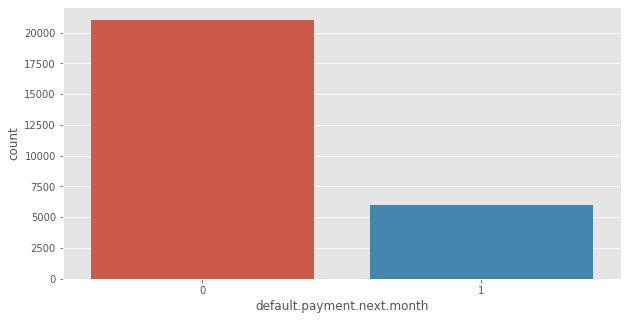

In [7]:
plt.figure(figsize = (10,5))
sns.countplot(y)

# y sotto rappresentato

Y is strongly unbalanced, 1 is approximately 1/5 of 0

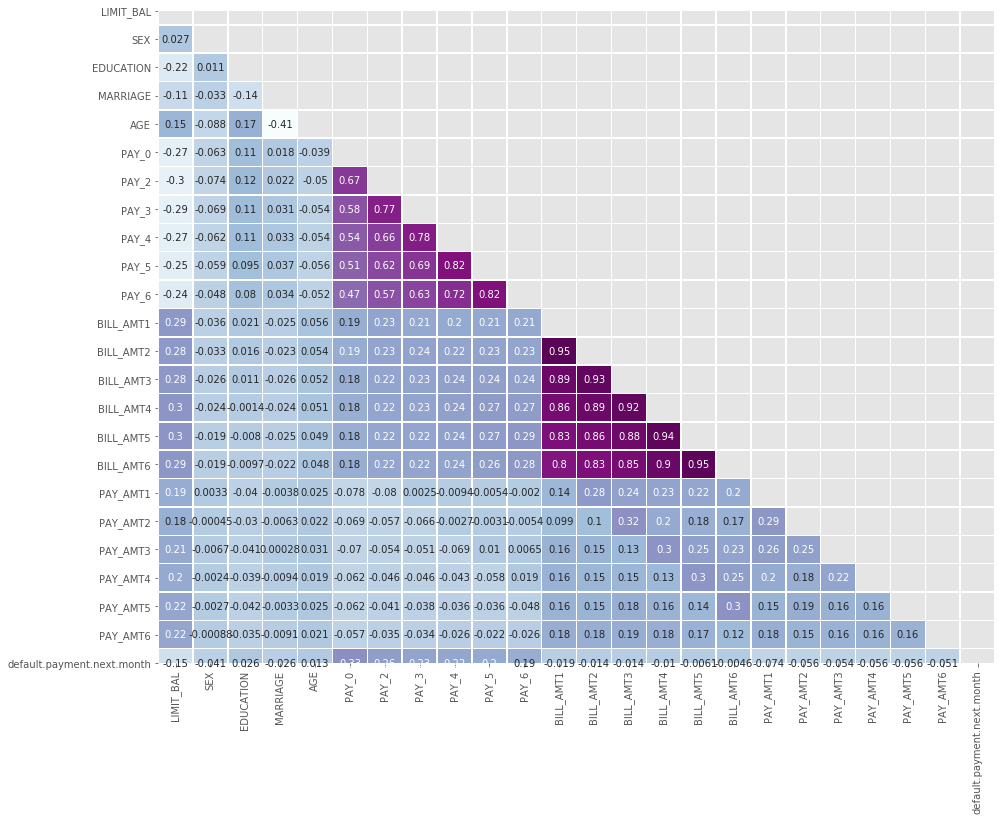

In [8]:
plt.figure(figsize = (15, 12))
corr = df.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap = "BuPu", linewidths = .5, annot = True, mask = mask, cbar = False)

# tutte le variabili X sono debolmente correlate con la nostra y

Correlations between X variables and y is very weak, presence of collinearity

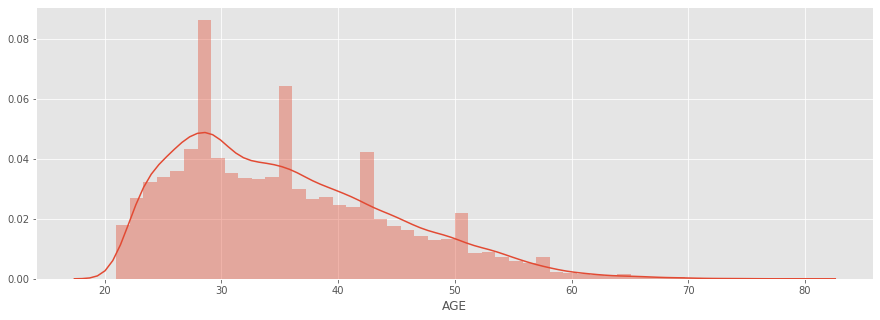

In [9]:
plt.figure(figsize = (15,5))
sns.distplot(X['AGE'])

Age distribution

In [10]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

Time to split our X's into quantitative and qualitative variables

In [11]:
Xquant = X[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

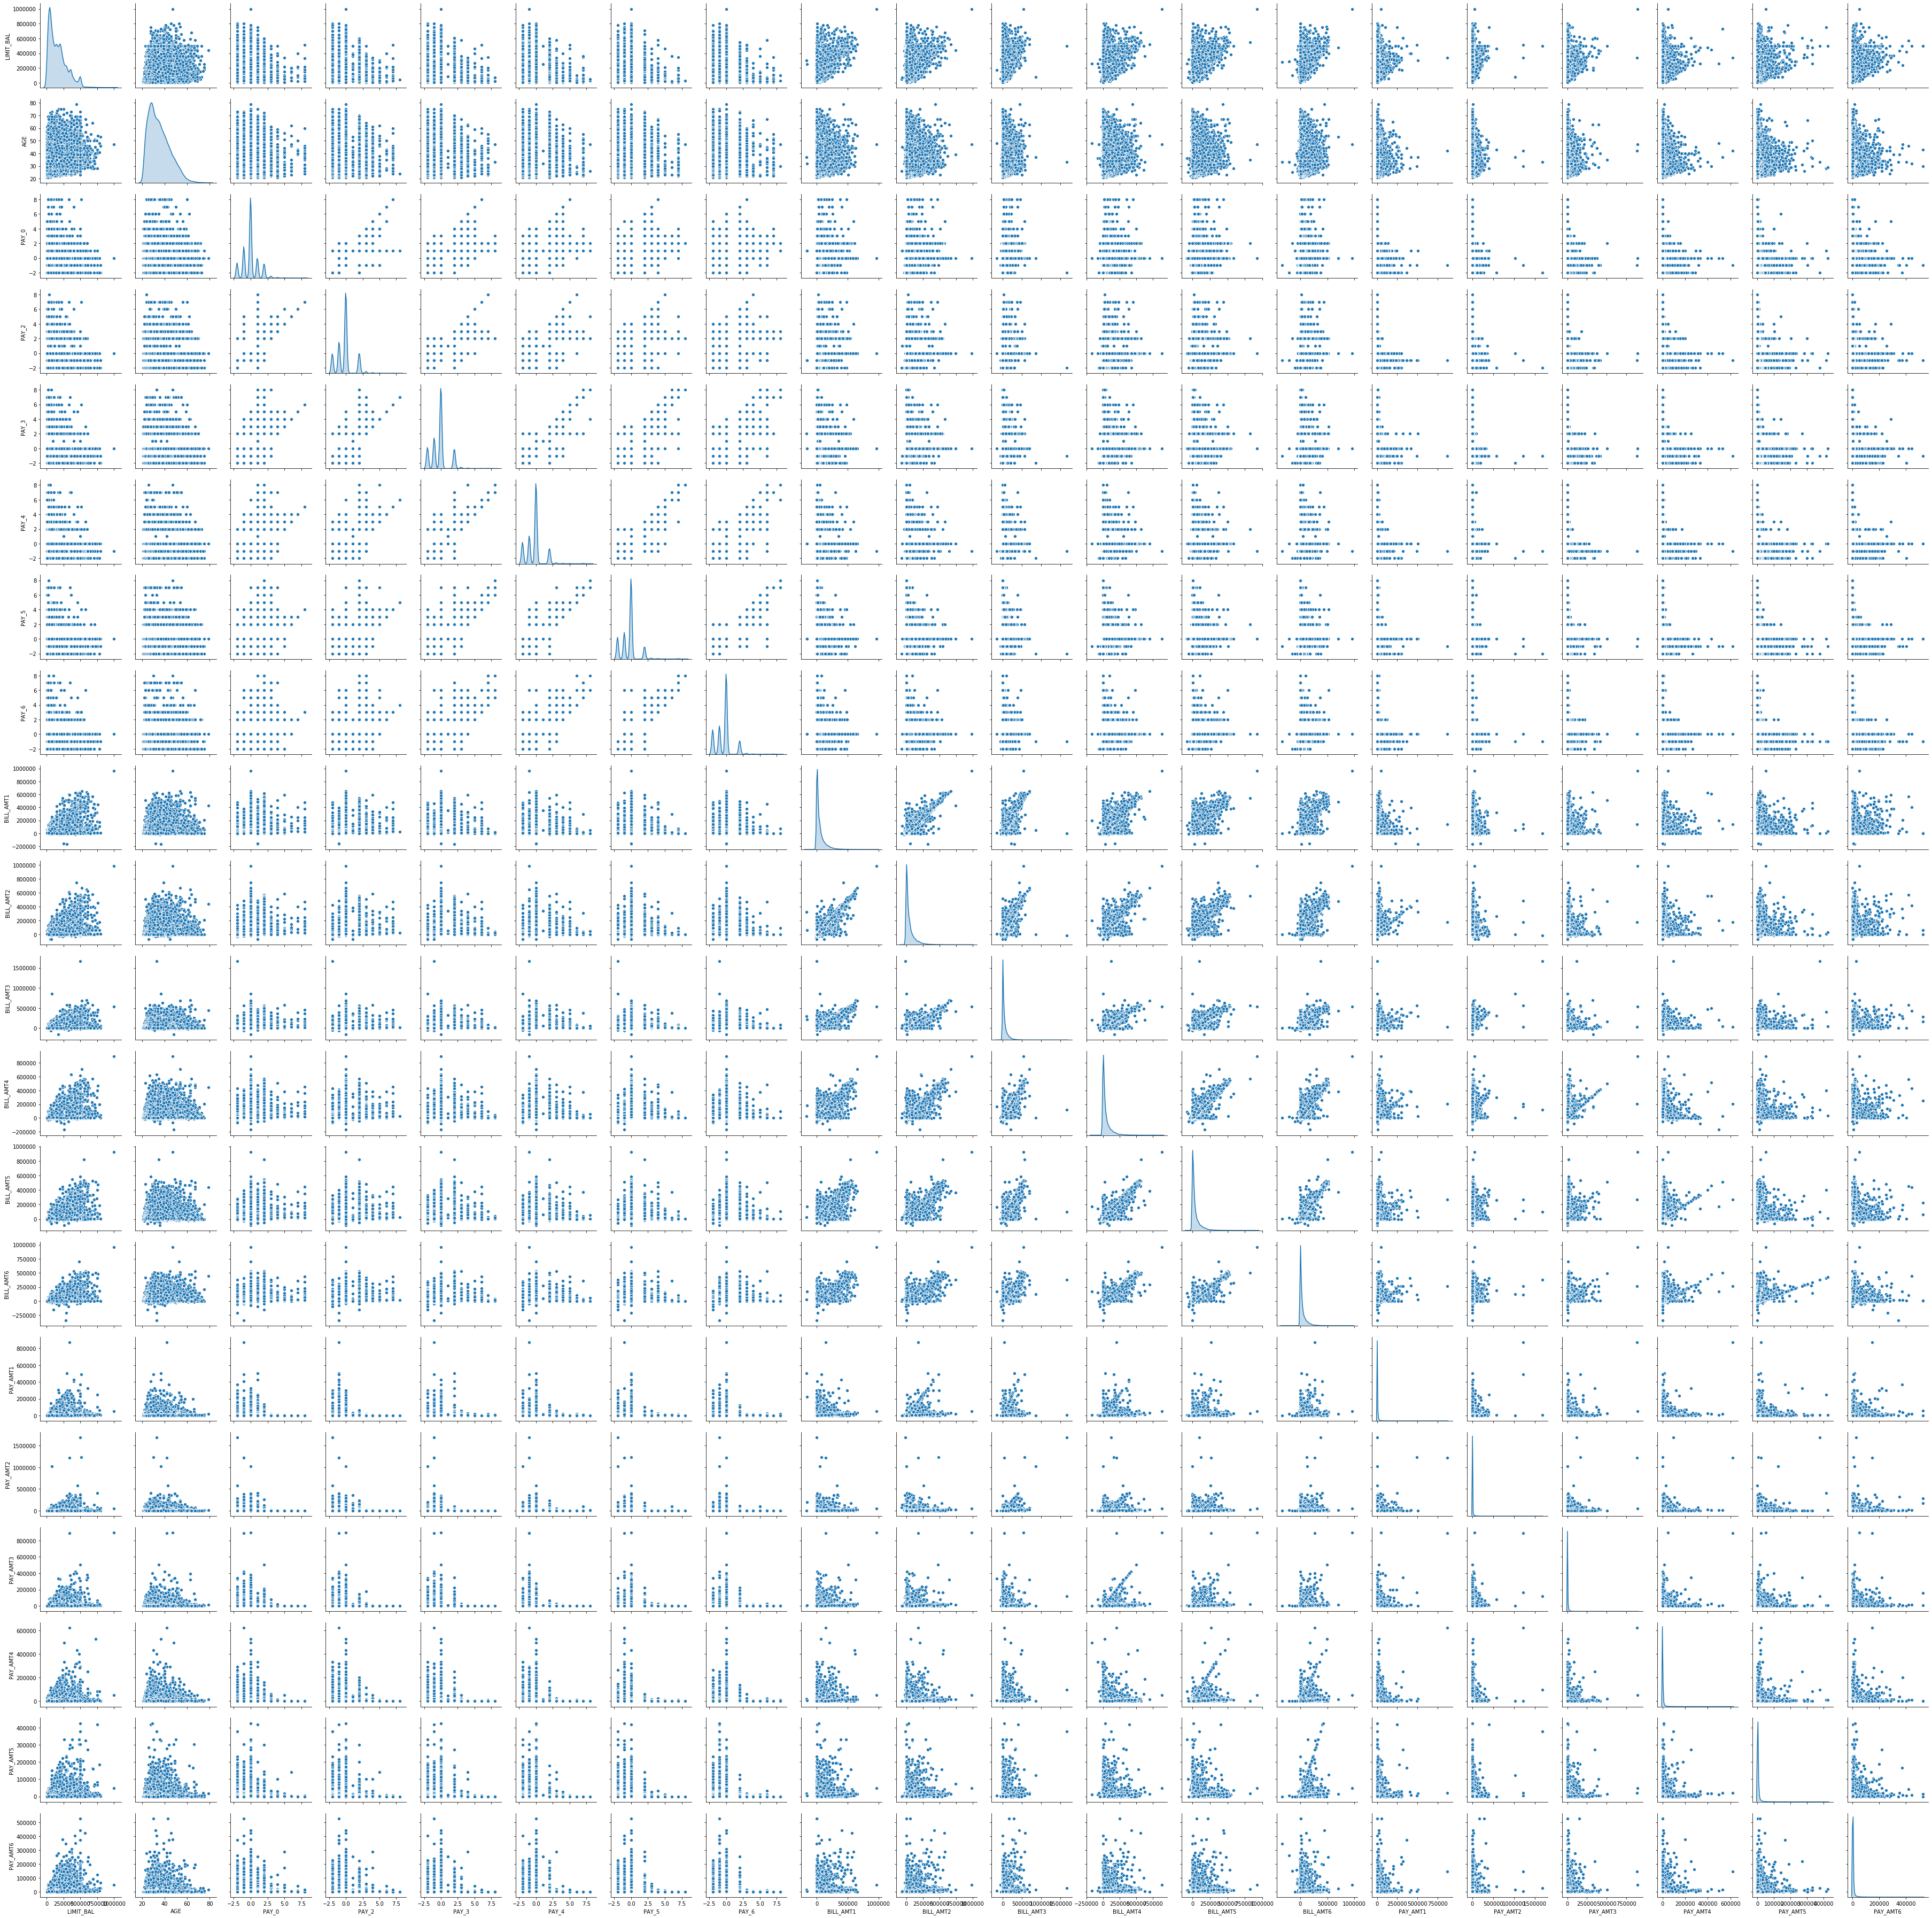

In [75]:
sns.pairplot(Xquant, diag_kind = "kde")

Every X variable is right skewed

In [12]:
Xqual = X.drop(Xquant.columns, axis = 1)

### Preprocessing

In [13]:
from sklearn.preprocessing import StandardScaler

On our quantitative variables we apply a standardization while on qualitative ones we apply a one-hot-encoding

In [14]:
sc = StandardScaler()

normalized_X = sc.fit_transform(Xquant)

normalized_X

array([[-1.13810392, -1.2455285 ,  1.79257926, ..., -0.30367294,
        -0.31877948, -0.28899328],
       [-0.36491721, -1.02828516, -0.872697  , ..., -0.24108685,
        -0.31877948, -0.17830987],
       [-0.59687322, -0.15931178,  0.01572842, ..., -0.24108685,
        -0.25230473, -0.01228476],
       ...,
       [-0.1329612 ,  0.81828326, -0.872697  , ..., -0.29559933,
        -0.31877948, -0.28899328],
       [-1.06078525,  0.16655323,  3.56943009, ..., -0.04081137,
        -0.18582998, -0.117434  ],
       [-0.67419189,  0.60103992,  0.90415384, ..., -0.18313213,
         3.20198915, -0.18915685]])

In [15]:
Xdumm = pd.get_dummies(data = Xqual, drop_first = True, columns = ['SEX', "EDUCATION", "MARRIAGE"])
Xdumm.head()

,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,0,1,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0
2,1,0,1,0,0,0,0,0,1,0
3,1,0,1,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,1,0,0


In [16]:
Xdumm = Xdumm.to_numpy()

In [17]:
print("dummy shape: {}".format(Xdumm.shape))
print("quantitative variables shape: {}".format(normalized_X.shape))

dummy shape: (27000, 10)
quantitative variables shape: (27000, 20)


In [18]:
X_prep = np.concatenate((normalized_X, Xdumm), axis = 1)

print("final X shape: {}".format(X_prep.shape)) # final input set

final X shape: (27000, 30)


In [19]:
y = y.to_numpy()

print("y shape: {}".format(y.shape)) # final output set

y shape: (27000,)


<hr>

### Create model

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from keras.regularizers import l2, l1, l1_l2
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report
import keras

In [22]:
def create_model(X_train, nb_classes, n1, n2,
                 third_layer = False, n3 = None, regularizer = None,
                 es_patience = 50, hidden_act = "relu", dropout = False, dropout_rate1 = .3, dropout_rate2 = .2,
                 dropout_rate3 = .1):
    dims = X_train.shape[1]
    print(dims, 'dims')
    print("Building model...")
    #n = 2
    nb_classes = nb_classes
    print(nb_classes, ' classes')

    model = Sequential()
    
    if dropout:
        model.add(Dense(n1,
                    activation = hidden_act, input_shape = (dims,)))
        model.add(Dropout(rate = dropout_rate1))
        model.add(Dense(n2, activation = hidden_act))
        
        if third_layer:
            model.add(Dropout(rate = dropout_rate2))
            model.add(Dense(n3, activation = hidden_act))
            model.add(Dropout(rate = dropout_rate3))
        
    else:
        model.add(Dense(n1, input_shape = (dims,),
                        activation = hidden_act,
                        kernel_regularizer = regularizer))

        model.add(Dense(n2, activation = hidden_act,
                    kernel_regularizer = regularizer))
        if third_layer:

            model.add(Dense(n3, activation = hidden_act,
                         kernel_regularizer = regularizer))
        

        
    es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = es_patience)
    model.add(Dense(nb_classes, activation = "sigmoid"))
    return model, es



def model_plot(history):
    plt.figure(figsize = (15, 5))
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc = 'upper left')
    plt.show()

    plt.figure(figsize = (15, 5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc = 'upper left')
    plt.show()
    
class Better_verbose(keras.callbacks.Callback):
    
    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        self.logs = []
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        
        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        
        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses)%50==0:
          #print(logs.get('loss'), logs.get('val_acc'))
            print("epoch n {}".format(len(self.losses)), end="\n")
            print(logs)
          

          
better_verbose = Better_verbose()

### Model without balancing on y

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_prep, y, test_size = .2, random_state = 42, stratify = y)

In [24]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

class_weights

array([0.64201641, 2.26035998])

30 dims
Building model...
1  classes
epoch n 50
{'val_loss': 0.4270131901016942, 'val_acc': 0.8225925925042894, 'loss': 0.42648394721525684, 'acc': 0.8200925925042895}
Epoch 00069: early stopping


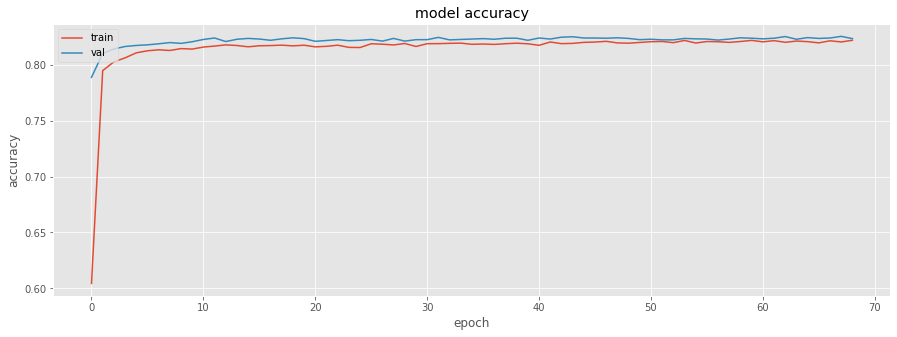

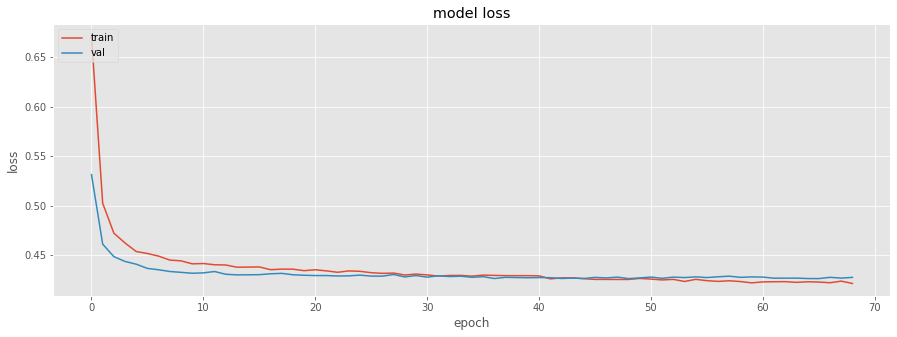

21600/21600 [==============================] - 1s 28us/step
loss value: 0.4140862194476304 | accuracy: 0.8238888888888889


In [26]:
model, es = create_model(X_train = X_train,
                     nb_classes = 1,
                     hidden_act = "relu",
                     n1 = 32,
                     dropout_rate1 = .15,
                     n2 = 16,
                     dropout_rate2 = .05,
                     n3 = 16,
                     dropout_rate3 = 0.0,
                     third_layer = True,
                     #regularizer = l1_l2(0.004, 0.001),
                     regularizer = None,
                     dropout = True,
                     es_patience = 20)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ["acc"])

history = model.fit(X_train, y_train
                    ,class_weight = class_weights
                    ,epochs = 100, 
                    validation_data = (X_val, y_val),
                    batch_size = 256,
                    verbose = 0
                    ,callbacks=[es, better_verbose]
                   )

model_plot(history)   
eval_model = model.evaluate(X_train, y_train)
print("loss value: {} | accuracy: {}".format(eval_model[0], eval_model[1]))

In [27]:
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5)


cm = confusion_matrix(y_val, y_pred)
prf = precision_recall_fscore_support(y_val, y_pred)

print("confusion matrix:\n", cm)
print()
print("precision: \n", prf[0])
print()
print("recall: \n", prf[1])
print()
print("f-score: \n", prf[2])
print()
print(classification_report(y_val, y_pred))

confusion matrix:
 [[4002  203]
 [ 750  445]]

precision: 
 [0.84217172 0.6867284 ]

recall: 
 [0.95172414 0.37238494]

f-score: 
 [0.89360277 0.4829083 ]

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4205
           1       0.69      0.37      0.48      1195

    accuracy                           0.82      5400
   macro avg       0.76      0.66      0.69      5400
weighted avg       0.81      0.82      0.80      5400



- Validation set 20% estratto dal training set, posto quindi all'80%. Tutto tramite campionamento stratified.
- Activation hidden layers = ReLU.
- Activation output layer = Sigmoid.
- Pesi personalizzati per l'unbalancing.
- 3 Layer rispettivamente con 32, 16, 16 neuroni.
- Optimizer = adam.
- loss = binary_crossentropy.
- Regularization = 3 layer di dropout con rate rispettivamente 0.15, 0.05 e 0.0 posti tra primo e secondo layer, tra secondo e terzo, tra terzo e output layer.

Prestazioni mediocri anche se la rete non overfitta. Buona accuracy ma falsata dall'unbalancing di y. Tutte le misure di fit: precision, recall ed f1-score risultano fortemente distorte per quanto riguarda la classe sbilanciata. Vale la pena adottare strategie di correzione dell'unbalancing di y.

### Creating model with oversampling (SMOTE strategy)

In [44]:
X_train_rs, X_val_rs, y_train_rs, y_val_rs = train_test_split(X_prep, y, test_size = .2, random_state = 42, stratify = y)

In [45]:
from imblearn.over_sampling import SMOTE

sampler = SMOTE()
X_train_rs, y_train_rs = sampler.fit_sample(X_train_rs, y_train_rs)

In [46]:
class_weights_rs = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train_rs),
                                                 y_train_rs)

class_weights_rs

array([1., 1.])

In [47]:
print(X_prep.shape)
print(X_train_rs.shape)
#print(X_test_rs.shape)
print(X_val_rs.shape)

(27000, 30)
(33644, 30)
(5400, 30)


30 dims
Building model...
1  classes
Epoch 00039: early stopping


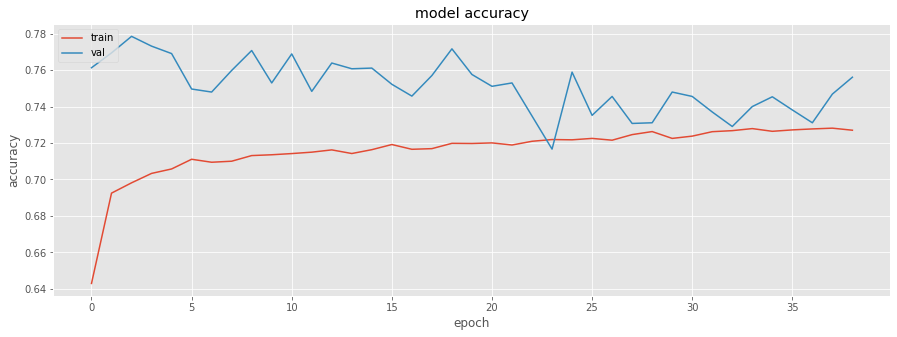

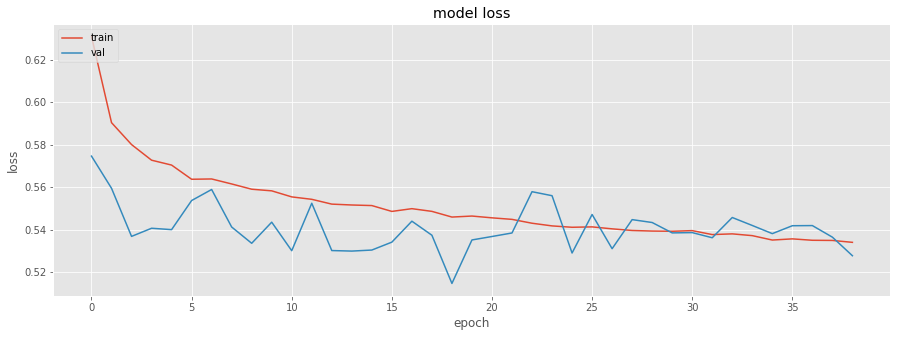

33644/33644 [==============================] - 1s 34us/step
loss value: 0.5218280617454618 | accuracy: 0.738616097966948


In [52]:
model_rs, es = create_model(X_train = X_train_rs,
                     nb_classes = 1,
                     hidden_act = "relu",
                     n1 = 32,
                     dropout_rate1 = 0.1,
                     n2 = 16,
                     dropout_rate2 = 0.05,
                     n3 = 16,
                     dropout_rate3 = 0.0,
                     third_layer = True,
                     regularizer = None,
                     #regularizer = l1_l2(0.0005, 0.001),
                     es_patience = 20,
                     dropout = True
                           )

model_rs.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ["acc"])

history_rs = model_rs.fit(X_train_rs, y_train_rs, 
                    class_weight = class_weights_rs, 
                    epochs = 100, 
                    validation_data = (X_val_rs, y_val_rs),
                    batch_size = 256,
                    verbose = 0,
                    callbacks=[es, better_verbose]
                   )

model_plot(history_rs)   
eval_model_rs = model_rs.evaluate(X_train_rs, y_train_rs)
print("loss value: {} | accuracy: {}".format(eval_model_rs[0], eval_model_rs[1]))

In [53]:
y_pred_rs = model_rs.predict(X_val_rs)
y_pred_rs = (y_pred_rs > 0.5)


cm_rs = confusion_matrix(y_val_rs, y_pred_rs)
prf_rs = precision_recall_fscore_support(y_val_rs, y_pred_rs)

print("confusion matrix:\n", cm_rs)
print()
print("precision: \n", prf_rs[0])
print()
print("recall: \n", prf_rs[1])
print()
print("f-score: \n", prf_rs[2])
print()
print(classification_report(y_val_rs, y_pred_rs))

confusion matrix:
 [[3352  853]
 [ 464  731]]

precision: 
 [0.87840671 0.4614899 ]

recall: 
 [0.79714625 0.61171548]

f-score: 
 [0.83580601 0.52608852]

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4205
           1       0.46      0.61      0.53      1195

    accuracy                           0.76      5400
   macro avg       0.67      0.70      0.68      5400
weighted avg       0.79      0.76      0.77      5400



A parità di condizioni e iperparametri (escludendo i rate dei layer di dropout) la valutazione di accuracy totale sul modello trainato con y bilancia tramite oversampling peggiora ma migliorano le altre misure, in media. Infatti le valutazioni di precision, recall ed f1-score migliorano sulla valutazione di quella che era la modalità sotto rappresentata ma peggiorano nella weighted avg f1-score.

### Creating model with undersampling

In [54]:
X_train_us, X_val_us, y_train_us, y_val_us = train_test_split(X_prep, y, test_size = .1, random_state = 42, stratify = y)

In [55]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_train_us, y_train_us = rus.fit_resample(X_train_us, y_train_us)

In [56]:
class_weights_us = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train_us),
                                                 y_train_us)

class_weights_us

array([1., 1.])

30 dims
Building model...
1  classes
Epoch 00044: early stopping


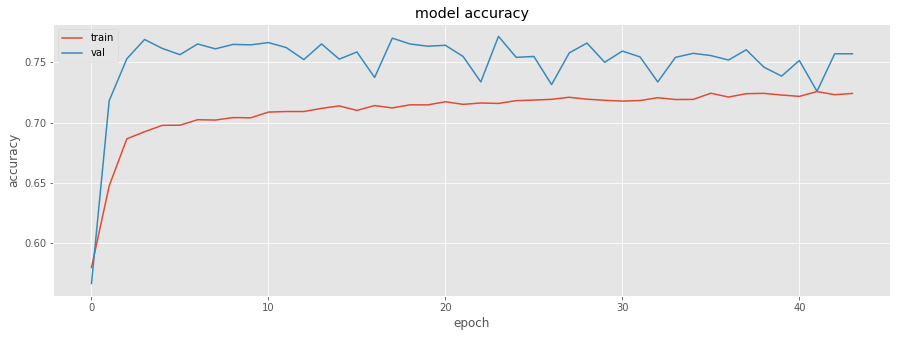

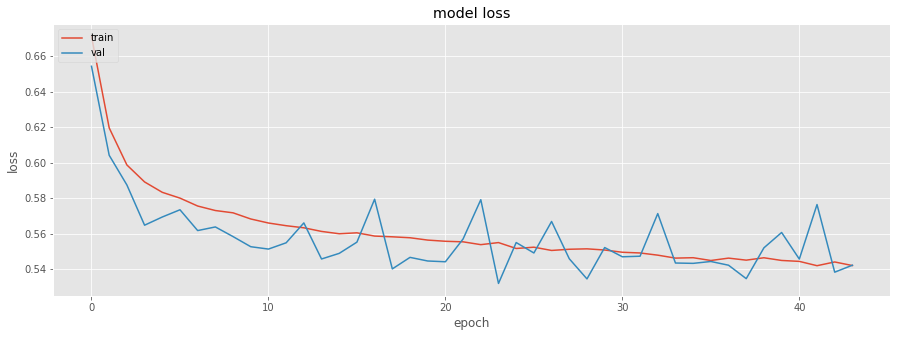

10752/10752 [==============================] - 0s 36us/step
loss value: 0.5349927471861953 | accuracy: 0.7296316964285714


In [59]:
model_us, es = create_model(X_train = X_train_us,
                     nb_classes = 1,
                     hidden_act = "relu",
                     n1 = 32,
                     dropout_rate1 = .02,
                     n2 = 16,
                     dropout_rate2 = .01,
                     n3 = 16,
                     dropout_rate3 = .0,
                     third_layer = True,
                     regularizer = None,
                     #regularizer = l1_l2(0.001, 0.01),
                     es_patience = 20,
                     dropout = True
                           )

model_us.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ["acc"])

history_us = model_us.fit(X_train_us, y_train_us, 
                   # class_weight = class_weights_us, 
                    epochs = 100, 
                    validation_data = (X_val_us, y_val_us),
                    batch_size = 256,
                    verbose = 0,
                    callbacks=[es, better_verbose]
                   )

model_plot(history_us)   
eval_model_us = model_us.evaluate(X_train_us, y_train_us)
print("loss value: {} | accuracy: {}".format(eval_model_us[0], eval_model_us[1]))

In [60]:
y_pred_us = model_us.predict(X_val_us)
y_pred_us = (y_pred_us > 0.5)


cm_us = confusion_matrix(y_val_us, y_pred_us)
prf_us = precision_recall_fscore_support(y_val_us, y_pred_us)

print("confusion matrix:\n", cm_us)
print()
print("precision: \n", prf_us[0])
print()
print("recall: \n", prf_us[1])
print()
print("f-score: \n", prf_us[2])
print()
print(classification_report(y_val_us, y_pred_us))

confusion matrix:
 [[1682  421]
 [ 235  362]]

precision: 
 [0.87741262 0.46232439]

recall: 
 [0.7998098  0.60636516]

f-score: 
 [0.83681592 0.52463768]

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      2103
           1       0.46      0.61      0.52       597

    accuracy                           0.76      2700
   macro avg       0.67      0.70      0.68      2700
weighted avg       0.79      0.76      0.77      2700



A parità di condizioni e iperparametri (fatta eccezione per i rate dei layer di dropout) la valutazione di accuracy totale sul modello trainato con y bilanciata tramite undersampling peggiora, probabilmente a causa della diminuzione delle osservazioni utili al training del classificatore, ma resta molto simile a quella ottenuta dal modello con dati sottoposti ad oversampling. Infatti le valutazioni di precision, recall ed f1-score restano stabili rispetto al modello precedente.

Il modello migliore per accuracy e weighted avg f1-score risulta essere il primo, con y sbilanciata e bilanciamento unicamente tramite i pesi della rete. Il modello con undersampling sulla modalità meno rappresentata della y risulta il migliore per risultato di f1-score sulla classe sbilanciata (anche se la differenza con gli altri è molto bassa).

### Predicting on test set with best model based on weighted avg f1-score

Il modello che ha raggiunto le migliori performance in fatto di f1-score è il modello con y sbilanciata e ribilanciata unicamente tramite l'ottimizzazione dei pesi.

In [61]:
test_set = pd.read_csv("test.csv")

In [62]:
test_set.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [63]:
test_set.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,30000.0,2,3,1,44,1,-2,-2,-2,-2,...,0.0,0.0,0.0,379.0,0.0,0.0,0.0,0.0,379.0,0.0
1,260000.0,2,1,2,28,0,0,0,0,0,...,93742.0,93369.0,82476.0,73789.0,10005.0,4026.0,3481.0,141.0,20074.0,60308.0
2,80000.0,1,1,2,25,0,0,0,0,0,...,53012.0,53571.0,56721.0,57312.0,3000.0,3404.0,2000.0,4000.0,3000.0,5000.0
3,70000.0,2,2,2,42,1,2,0,0,0,...,59018.0,48033.0,48833.0,49736.0,10.0,2200.0,2100.0,1900.0,1841.0,1945.0
4,400000.0,1,3,1,33,0,0,2,0,0,...,2192.0,11111.0,5675.0,5071.0,4009.0,6.0,10248.0,4721.0,4114.0,1855.0


In [64]:
test_set_quant = test_set[['LIMIT_BAL','AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

test_set_qual = test_set.drop(test_set_quant.columns, axis = 1)

In [65]:
normalized_test_set = sc.transform(test_set_quant)

normalized_test_set

array([[-1.06078525,  0.92690493,  0.90415384, ..., -0.30367294,
        -0.29358555, -0.28899328],
       [ 0.71754418, -0.81104181,  0.01572842, ..., -0.2948483 ,
         1.01563464,  3.04855419],
       [-0.67419189, -1.13690683,  0.01572842, ..., -0.05332859,
        -0.11935523, -0.01228476],
       ...,
       [-0.44223588, -0.4851768 ,  1.79257926, ..., -0.17850076,
        -0.31877948,  4.8945874 ],
       [ 1.33609355,  0.92690493, -1.76112242, ...,  0.40805604,
        -0.15697994, -0.16602401],
       [ 0.9495002 ,  0.49241824, -0.872697  , ..., -0.26925059,
        -0.28221837, -0.28899328]])

In [66]:
testdumm = pd.get_dummies(data = test_set_qual, drop_first = True, columns = ['SEX', "EDUCATION", "MARRIAGE"])
testdumm.head()

,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,0,0,1,0,0,0,1,0,0
1,1,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,1,0
3,1,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,1,0,0


In [67]:
testdumm = testdumm.to_numpy()

In [68]:
X_test = np.concatenate((normalized_test_set, testdumm), axis = 1)

In [69]:
X_test.shape

(3000, 30)

In [73]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [74]:
predictions = [int(obs) for obs in y_pred]

In [75]:
len(predictions)

3000

In [76]:
len(set(predictions))

2

In [77]:
pd.Series(predictions).value_counts()

0    2645
1     355
dtype: int64

In [78]:
with open("Fabrizio_D'Intinosante_838866_score1.txt", 'w') as f:
    for item in predictions:
        f.write(str(item)+",\n")